In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/labels/sports_train_data.data
/kaggle/input/labels/lifestyle_train_data.data
/kaggle/input/labels/car_train_data.data
/kaggle/input/labels/politics_train_data.data
/kaggle/input/labels/food_train_data.data
/kaggle/input/labels/travel_train_data.data
/kaggle/input/labels/funny_train_data.data
/kaggle/input/labels/business_train_data.data
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv


In [2]:
import tensorflow as tf

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


2022-04-26 12:23:06.064456: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-26 12:23:06.129223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 12:23:06.223969: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 12:23:06.225196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [5]:
import string as string

In [6]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string


def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [7]:
import re

In [8]:
train_data= pd.read_csv('../input/dataset/train.csv')
train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['tweet'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('===========Train Data =========')
print(train_data['label'].value_counts())
print(len(train_data))
print('==============================')


train_data['tweet'] = train_data['tweet'].apply(remove_emoji)
train_data['tweet'] = train_data['tweet'].apply(remove_url)
train_data['tweet'] = train_data['tweet'].apply(clean_text)


test_data= pd.read_csv("../input/dataset/test.csv")
test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['tweet'].apply(lambda x:len(str(x).split())) 
mask = test_data['Num_words_text'] >2
test_data = test_data[mask]
print('===========Test Data =========')
print(test_data['label'].value_counts())
print(len(test_data))
print('==============================')

test_data['tweet'] = test_data['tweet'].apply(remove_emoji)
test_data['tweet'] = test_data['tweet'].apply(remove_url)
test_data['tweet'] = test_data['tweet'].apply(clean_text)

===========Train Data =========
travel       3009
car          1537
funny        1532
business     1496
music        1470
politics     1465
sports       1420
lifestyle    1335
food         1258
Name: label, dtype: int64
14522
===========Test Data =========
travel       731
funny        395
car          386
music        378
sports       377
business     373
lifestyle    367
politics     332
food         293
Name: label, dtype: int64
3632


In [9]:
from collections import Counter

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(), train_data['label'].tolist(), test_size=0.33,stratify = train_data['label'].tolist(), random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution: '+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution: '+ str(Counter(y_valid)))




x_train=np.asarray(X_train)
x_valid = np.array(X_valid)
x_test =np.asarray(test_data['tweet'].tolist())

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:9729
Class distribution: Counter({'travel': 2016, 'car': 1030, 'funny': 1026, 'business': 1002, 'music': 985, 'politics': 982, 'sports': 951, 'lifestyle': 894, 'food': 843})
Valid data len:4793
Class distribution: Counter({'travel': 993, 'car': 507, 'funny': 506, 'business': 494, 'music': 485, 'politics': 483, 'sports': 469, 'lifestyle': 441, 'food': 415})


2022-04-26 12:23:10.393196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 12:23:10.394133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 12:23:10.394810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 12:23:10.395759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 12:23:10.396530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [12]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['lifestyle', 'travel', 'travel', 'music', 'food', 'lifestyle', 'car', 'lifestyle', 'car', 'business']
Text to number
[4 8 8 5 2 4 1 4 1 0]
Number to category
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==5:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==5:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==5:
        break  
    

======Train dataset ====
tf.Tensor(b'social media platforms lots pressure people ranging from education fashion religion money soc\xe2\x80\xa6', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(9,), dtype=float32)
tf.Tensor(b'jasondogwood guess what missouri texas allowed restrict outofstate travel pregnant women seeking abortions', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(9,), dtype=float32)
tf.Tensor(b'ngwata museveni learning that travel back nairobi again time less than month', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(9,), dtype=float32)
tf.Tensor(b'bruce springsteen spotted walking around favorite jersey shore town brucespringsteen jerseyshore theboss', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(9,), dtype=float32)
tf.Tensor(b'jeezy5starr brother food', shape=(), dtype=string) tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(9,), dtype=float32)
======Validation dataset ====


In [14]:
import matplotlib.pyplot as plt

In [15]:
import tensorflow_hub as hub

In [16]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

2022-04-26 12:23:17.703439: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [17]:
print(x_train[:1])
hub_layer(x_train[:1])

['social media platforms lots pressure people ranging from education fashion religion money soc…']


<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 2.1284156 ,  0.1382472 ,  1.2307853 , -0.3120015 ,  0.86070615,
        -1.8687643 ,  1.29644   , -0.15489687,  0.59228706, -1.016591  ,
         0.41911325,  0.6040827 , -3.123526  ,  0.6039775 , -0.7512835 ,
        -1.1546434 ,  1.8089782 , -1.2832795 , -0.7538979 , -1.0994885 ]],
      dtype=float32)>

In [18]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(9,activation='sigmoid'))



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 99        
Total params: 389,689
Trainable params: 389,689
Non-trainable params: 0
_________________________________________________________________


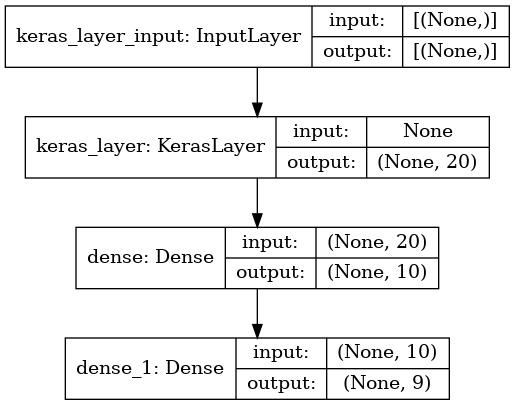

In [19]:
tf.keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)


In [20]:
epochs = 20

# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


77/77 [==============================] - 2s 7ms/step - loss: 2.2886 - categorical_accuracy: 0.1369 - val_loss: 2.1554 - val_categorical_accuracy: 0.1792
Epoch 2/20
77/77 [==============================] - 0s 5ms/step - loss: 2.0566 - categorical_accuracy: 0.2435 - val_loss: 1.9856 - val_categorical_accuracy: 0.3082
Epoch 3/20
77/77 [==============================] - 0s 5ms/step - loss: 1.8679 - categorical_accuracy: 0.3691 - val_loss: 1.8007 - val_categorical_accuracy: 0.3950
Epoch 4/20
77/77 [==============================] - 0s 5ms/step - loss: 1.6712 - categorical_accuracy: 0.4524 - val_loss: 1.6313 - val_categorical_accuracy: 0.4530
Epoch 5/20
77/77 [==============================] - 0s 5ms/step - loss: 1.4925 - categorical_accuracy: 0.5160 - val_loss: 1.4822 - val_categorical_accuracy: 0.5110
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 1.3296 - categorical_accuracy: 0.5731 - val_loss: 1.3518 - val_categorical_accuracy: 0.5602
Epoch 7/20
77/77 [=========

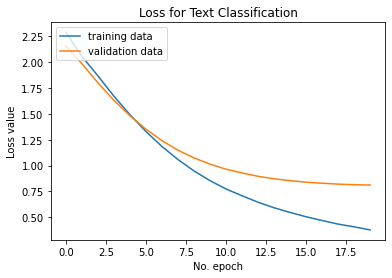

In [21]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

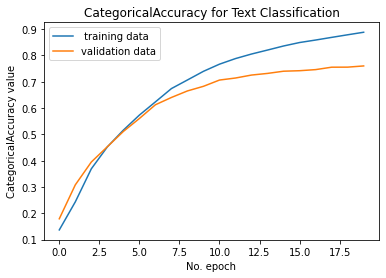

In [22]:
plt.plot(history.history['categorical_accuracy'], label=' training data')
plt.plot(history.history['val_categorical_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [23]:
from tensorflow.python.keras import regularizers

In [24]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.L2(0.05)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(9,activation='sigmoid',kernel_regularizer=regularizers.L2(0.05)))



model1.summary()
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 99        
Total params: 389,689
Trainable params: 389,689
Non-trainable params: 0
_________________________________________________________________


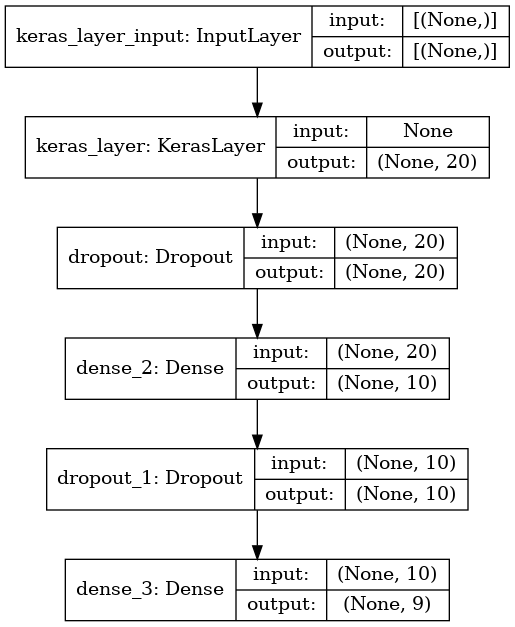

In [25]:
tf.keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [26]:
history1 = model1.fit(train_ds.shuffle(1000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


77/77 [==============================] - 1s 7ms/step - loss: 4.1000 - categorical_accuracy: 0.1413 - val_loss: 3.0742 - val_categorical_accuracy: 0.1755
Epoch 2/20
77/77 [==============================] - 0s 5ms/step - loss: 3.1616 - categorical_accuracy: 0.1810 - val_loss: 2.6952 - val_categorical_accuracy: 0.3086
Epoch 3/20
77/77 [==============================] - 0s 6ms/step - loss: 2.7565 - categorical_accuracy: 0.2039 - val_loss: 2.4986 - val_categorical_accuracy: 0.3643
Epoch 4/20
77/77 [==============================] - 0s 5ms/step - loss: 2.5304 - categorical_accuracy: 0.2337 - val_loss: 2.3558 - val_categorical_accuracy: 0.3768
Epoch 5/20
77/77 [==============================] - 0s 6ms/step - loss: 2.3817 - categorical_accuracy: 0.2636 - val_loss: 2.2389 - val_categorical_accuracy: 0.3795
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 2.2595 - categorical_accuracy: 0.2779 - val_loss: 2.1498 - val_categorical_accuracy: 0.3680
Epoch 7/20
77/77 [=========

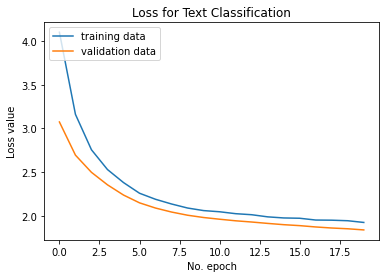

In [27]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

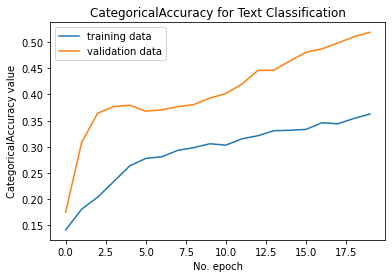

In [28]:
plt.plot(history1.history['categorical_accuracy'], label='training data')
plt.plot(history1.history['val_categorical_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [29]:
print("Evaluate on test data")
results = model.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
114/114 [==============================] - 0s 2ms/step - loss: 0.8687 - categorical_accuracy: 0.7605
test loss, test acc: [0.8686946034431458, 0.7604625821113586]
Generate predictions for all samples
[[1.04688987e-01 1.96669325e-01 1.91665799e-06 ... 2.38325313e-07
  1.11465283e-01 1.00000000e+00]
 [4.72470284e-01 5.74485719e-01 1.22926254e-02 ... 6.32607281e-01
  6.19199872e-01 6.11888409e-01]
 [4.95236546e-01 1.15343779e-01 1.51623443e-01 ... 1.50838483e-03
  1.30411226e-03 9.99315977e-01]
 ...
 [6.73847646e-02 1.90736838e-02 4.94191498e-01 ... 3.19171622e-02
  5.84007502e-01 9.18252647e-01]
 [3.99368033e-02 1.36563275e-02 2.34511439e-02 ... 8.99723619e-02
  1.50492445e-01 3.29358118e-05]
 [1.78897679e-01 5.98537207e-01 6.17893692e-03 ... 3.57734528e-03
  2.76946537e-02 9.96731162e-01]]


In [30]:
test_data['pred_label']=le.inverse_transform(predict_results)

In [31]:
test_data.head()

,tweet,label,Num_words_text,pred_label
0,papariri9 true story shared radio medical doct...,travel,27,travel
1,tracktransbills kentucky legislative session e...,sports,23,music
2,periuspb cant afford food pasta landlord physi...,travel,21,travel
3,papariri9 true story shared radio medical doct...,travel,27,travel
4,hermainem lets meet megálo culture oasis megál...,lifestyle,23,lifestyle


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(test_data['label'],test_data['pred_label'])

0.7604625550660793

In [34]:
model.save('tw_model')

2022-04-26 12:23:48.655314: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [35]:
loaded_model = tf.keras.models.load_model('./tw_model')

In [36]:
loaded_model.predict(x_test)

array([[1.04688987e-01, 1.96669325e-01, 1.91665799e-06, ...,
        2.38325313e-07, 1.11465283e-01, 1.00000000e+00],
       [4.72470284e-01, 5.74485719e-01, 1.22926254e-02, ...,
        6.32607281e-01, 6.19199872e-01, 6.11888409e-01],
       [4.95236546e-01, 1.15343779e-01, 1.51623443e-01, ...,
        1.50838483e-03, 1.30411226e-03, 9.99315977e-01],
       ...,
       [6.73847646e-02, 1.90736838e-02, 4.94191498e-01, ...,
        3.19171622e-02, 5.84007502e-01, 9.18252647e-01],
       [3.99368033e-02, 1.36563275e-02, 2.34511439e-02, ...,
        8.99723619e-02, 1.50492445e-01, 3.29358118e-05],
       [1.78897679e-01, 5.98537207e-01, 6.17893692e-03, ...,
        3.57734528e-03, 2.76946537e-02, 9.96731162e-01]], dtype=float32)